In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [95]:
df = pd.read_csv("mcdonalds.csv")
df.drop_duplicates()
df.shape

(1453, 15)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [97]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [98]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [99]:
age_groups = []
for age in df['Age']:
    age_groups.append(str(round(age/10))+'0s')

print(len(age_groups))
age_groups[0:10]

1453


['60s', '50s', '60s', '70s', '50s', '60s', '60s', '20s', '60s', '30s']

In [100]:
df['ageGroup'] = age_groups
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,ageGroup
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,60s
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,50s
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,60s
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,70s
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,50s


c:\Users\Bhai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bhai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bhai\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='count'>

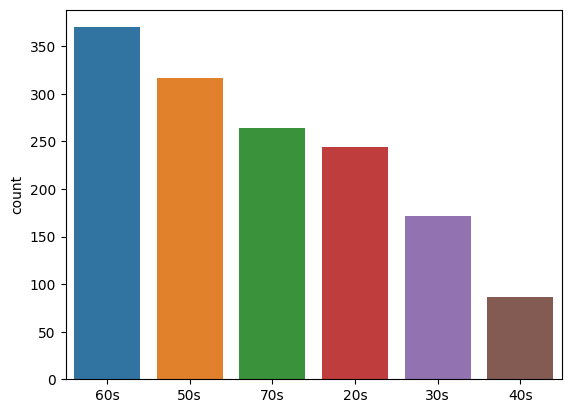

In [101]:

sns.barplot(x=df["ageGroup"].unique(),y=df["ageGroup"].value_counts())
# df["ageGroup"].unique()

In [102]:
# index = 0
# freq_dic = {}
# for i in df.VisitFrequency.unique():
#     freq_dic[i] = index
#     index += 1

# # frequency is given dummy

# like_lis = []
# for j in df.Like:
#     if j == '0':
#         like_lis.append(0)
#     elif j[-2] == '-':
#         like_lis.append(int('-'+j[-1]))
#     else:
#         like_lis.append(int(j[-1]))



In [108]:
mod_df = df.copy()
mod_df.yummy = df.yummy.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.convenient = df.convenient.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.spicy = df.spicy.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.fattening = df.fattening.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.greasy = df.greasy.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.fast = df.fast.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.cheap = df.cheap.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.tasty = df.tasty.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.healthy = df.healthy.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.disgusting = df.disgusting.replace(to_replace=["No","Yes"], value=[0,1])
mod_df.expensive = df.expensive.replace(to_replace=["No","Yes"], value=[0,1])
# mod_df.VisitFrequency = df.VisitFrequency.replace(freq_dic)
# mod_df.Like = like_lis

mod_df.drop(columns=["Like","Age","VisitFrequency","Gender","ageGroup"],axis=1,inplace=True)
mod_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [126]:
pca = PCA()
pca = pca.fit_transform(mod_df)

columnNames = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11','PC12']
pca_mod_data = pd.DataFrame(data = pca, columns = mod_df.columns)
pca_mod_data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,label
0,-1.357222,0.421965,0.569302,0.205560,-0.511200,0.230844,-0.214613,-0.295159,0.322772,0.009076,0.756017,-0.507412
1,-2.323900,-0.222635,-0.979287,0.033506,-0.258782,-0.046891,-0.153515,-0.200896,0.122489,0.119725,0.640626,-0.451276
2,2.603802,0.386577,-0.442581,0.404058,0.395289,1.220557,-0.184748,0.715794,-0.179176,-0.081412,-0.025000,0.235170
3,-2.497249,-0.183193,-0.575131,-0.348302,0.492762,-0.508110,-0.272928,-0.257163,-0.052508,-0.177990,-0.125442,-0.053546
4,-1.608250,0.176297,0.356272,0.193053,0.205160,0.907186,0.589697,-0.136547,-0.044614,0.064741,-0.090772,0.069900
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0.594866,1.553601,-0.158448,0.157761,0.163571,-0.215799,0.334892,0.138795,0.099902,-0.433137,-0.236460,-0.468223
1449,1.545433,-0.952972,0.312813,0.174786,0.512810,-0.042813,0.848252,0.260074,0.198354,-0.584982,-0.010266,-0.190583
1450,2.775076,-0.170025,-0.270851,0.035205,-0.350342,-0.150993,-0.243275,-0.226841,0.089286,-0.090410,0.176989,0.004379
1451,-0.421933,-1.183087,0.310292,0.815472,0.276119,-0.075513,0.048493,-0.095566,-0.197625,0.228639,-0.148683,-0.120537


Text(0.5, 1.0, 'Distance of different K Values')

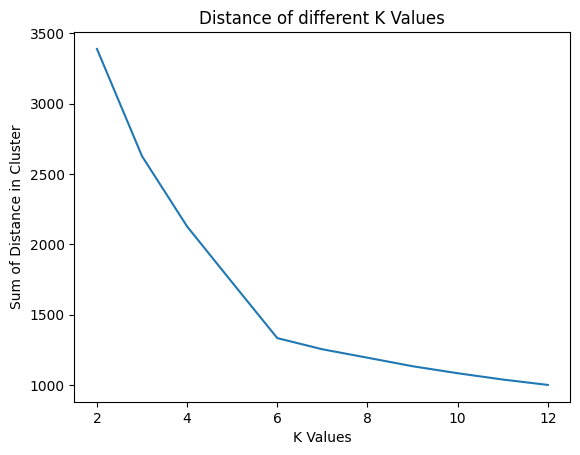

In [170]:
k_values = range(2, 13)
inertia_values = []
predicted_score = {}

for k in k_values:
    kmeansModel = KMeans(n_clusters=k, n_init=300, random_state=2)
    kmeansModel.fit(pca_mod_data)
    inertia_values.append(kmeansModel.inertia_)
    predicted_score[f"kMeans_{k}"] = kmeansModel.score(pca_mod_data)



plt.plot(k_values, inertia_values)
plt.xlabel("K Values")
plt.ylabel("Sum of Distance in Cluster")
plt.title("Distance of different K Values")

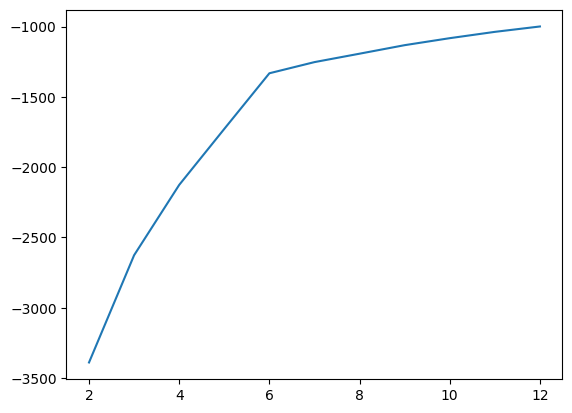

In [177]:
plt.plot([i for i in range(2,13)], predicted_score.values())

In [167]:
# 6 is the 

k_values = range(2, 7)
inertia_values = []
predicted_df = pca_mod_data.copy(deep=False)

for k in k_values:
    kmeansModel = KMeans(n_clusters=k, n_init=300, random_state=2)
    kmeansModel.fit(pca_mod_data)
    
    predicted_df[f"kMeans_{k}"] = kmeansModel.labels_ 


predicted_df
# predicted_score

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,label,kMeans_2,kMeans_3,kMeans_4,kMeans_5,kMeans_6
0,-1.357222,0.421965,0.569302,0.205560,-0.511200,0.230844,-0.214613,-0.295159,0.322772,0.009076,0.756017,-0.507412,1,2,1,0,5
1,-2.323900,-0.222635,-0.979287,0.033506,-0.258782,-0.046891,-0.153515,-0.200896,0.122489,0.119725,0.640626,-0.451276,1,2,1,4,2
2,2.603802,0.386577,-0.442581,0.404058,0.395289,1.220557,-0.184748,0.715794,-0.179176,-0.081412,-0.025000,0.235170,0,1,2,1,4
3,-2.497249,-0.183193,-0.575131,-0.348302,0.492762,-0.508110,-0.272928,-0.257163,-0.052508,-0.177990,-0.125442,-0.053546,1,2,1,4,2
4,-1.608250,0.176297,0.356272,0.193053,0.205160,0.907186,0.589697,-0.136547,-0.044614,0.064741,-0.090772,0.069900,1,2,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0.594866,1.553601,-0.158448,0.157761,0.163571,-0.215799,0.334892,0.138795,0.099902,-0.433137,-0.236460,-0.468223,0,0,0,2,3
1449,1.545433,-0.952972,0.312813,0.174786,0.512810,-0.042813,0.848252,0.260074,0.198354,-0.584982,-0.010266,-0.190583,0,1,2,1,1
1450,2.775076,-0.170025,-0.270851,0.035205,-0.350342,-0.150993,-0.243275,-0.226841,0.089286,-0.090410,0.176989,0.004379,0,1,2,1,4
1451,-0.421933,-1.183087,0.310292,0.815472,0.276119,-0.075513,0.048493,-0.095566,-0.197625,0.228639,-0.148683,-0.120537,1,0,3,3,0


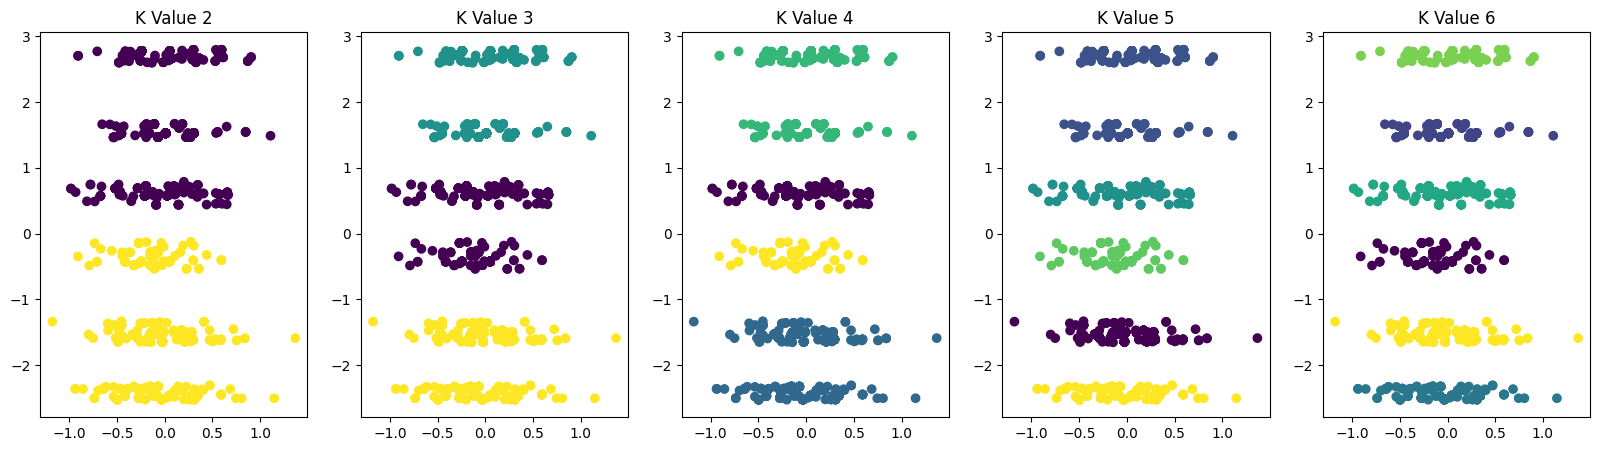

In [160]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=2):
    ax.scatter(x = predicted_df.cheap , y = predicted_df.yummy, c = predicted_df[f"kMeans_{i}"])
    ax.set_title(f"K Value {i}")
      


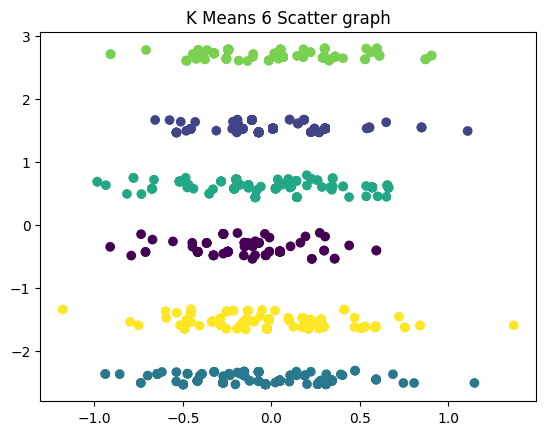

In [163]:
# import matplotlib.pyplot as plt
 
#filter rows of original data

# #plotting the results
plt.scatter(x = predicted_df.cheap , y = predicted_df.yummy, c = predicted_df[f"kMeans_{6}"])
plt.title("K Means 6 Scatter graph")
plt.show()